# Artificial Intelligence Week 2

> Tags: #traveling-salesman-problem #tsp #artificial-intelligence #ai #python #jupyter-notebook

**Author:** [Liz](https://github.com/liz-cpu)

In [47]:
import matplotlib.pyplot as plt
import random
import time
import itertools
import math
from collections import namedtuple

## 1. TSP – ROUTE ALONG 500 CITIES

> a) On Blackboard, you can find the Python script tsp_start.py



10 city tour with length 3648.9 in 1.031 secs for try_all_tours
Start plotting ...


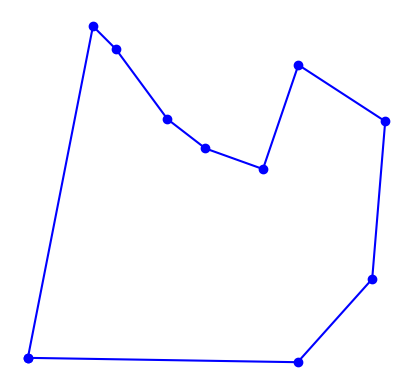

In [48]:
# based on Peter Norvig's IPython Notebook on the TSP

City = namedtuple('City', 'x y')


def distance(A: City, B: City) -> float:
    return math.hypot(A.x - B.x, A.y - B.y)


def try_all_tours(cities: frozenset) -> list:
    """
    Generate and test all tours of the cities and pick the shortest one.
    """
    tours = alltours(cities)
    return min(tours, key=tour_length)


def alltours(cities: frozenset) -> list[list]:
    """
    Return a list of tours (a list of lists), each tour a permutation of cities,
    and each one starting with the same city
    note: cities is a set, sets don't support indexing
    """
    start = next(iter(cities))
    return [[start] + list(rest) for rest in itertools.permutations(cities - {start})]


def tour_length(tour: list) -> float:
    """
    Calculate the total length of the tour
    """
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))


def make_cities(n: int, width: int = 1000, height: int = 1000):
    """
    Makes a set of n cities, each with random coordinates within a rectangle (width x height).
    The current system time is used as a seed
    note: if we used the same seed, we'd get the same set of cities
    """
    random.seed("hanze")
    return frozenset(City(random.randrange(width), random.randrange(height)) for c in range(n))

def plot_tour(tour: list) -> None:
    """
    Plot a tour, i.e. the order in which we visit the cities in the tour.
    Cities are represented as circles centred on their coordinates, and the tour
    is shown as lines joining the cities.
    """
    points = list(tour) + [tour[0]]
    plt.plot([p.x for p in points], [p.y for p in points], 'bo-')
    plt.axis('scaled')  # equal increments of x and y have the same length
    plt.axis('off')
    plt.show()


def plot_tsp(algorithm: callable, cities: frozenset) -> None:
    """
    Applies the given algorithm to cities, and visualises the results.
    """
    t0 = time.process_time()
    tour = algorithm(cities)
    t1 = time.process_time()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    print("Start plotting ...")
    plot_tour(tour)

plot_tsp(try_all_tours, make_cities(10))


> Expand this program with a Nearest Neighbor (NN) algorithm so that a route is calculated along all cities. This can be done in approximately 10 lines of code. Test the program with 10 cities. How much percentage does the result of NN deviate from the optimal route? Tip: if you enter the same n in random.seed(n), you will get the same set of cities.

In [49]:
def nearest_neighbour(cities: frozenset) -> list:
    """
    Using the nearest neighbour algorithm, find a tour starting from the first
    city and going to the nearest neighbour, etc.
    """
    cities = set(cities)  # defrost the cities
    start = next(iter(cities))  # the first city
    tour = [start]
    unvisited = cities - set([start])
    while unvisited:
        nearest = min(unvisited, key=lambda city: distance(city, tour[-1]))
        tour.append(nearest)
        unvisited.remove(nearest)
    return tour

10 city tour with length 3648.9 in 1.078 secs for try_all_tours
Start plotting ...


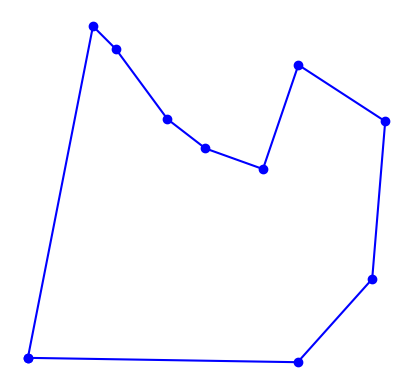

10 city tour with length 4164.1 in 0.000 secs for nearest_neighbour
Start plotting ...


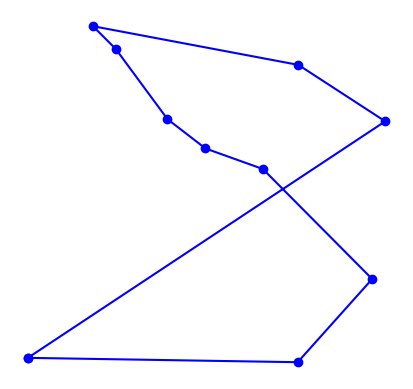

In [50]:
plot_tsp(try_all_tours, make_cities(10))
plot_tsp(nearest_neighbour, make_cities(10))


> b) How long does the NN program take for a route with 500 cities, and what is the total length of the route?

500 city tour with length 19445.9 in 0.016 secs for nearest_neighbour
Start plotting ...


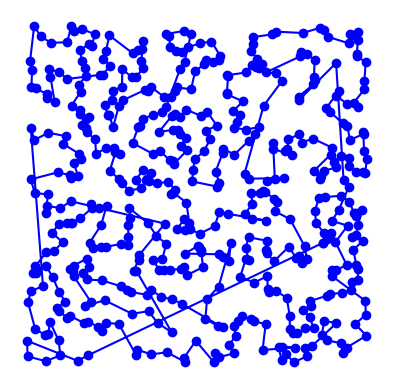

In [51]:
plot_tsp(nearest_neighbour, make_cities(500))

> c) When you try the NN program several times, you will notice that there are always some crossing roads (branches). How many pairs of branches are there in a route of N cities? Describe your strategy for finding crossing roads (branches). Provide an algorithm in pseudocode. Suppose you undo a crossing, is it necessary (according to your strategy) to check if the new route is shorter than the old one?

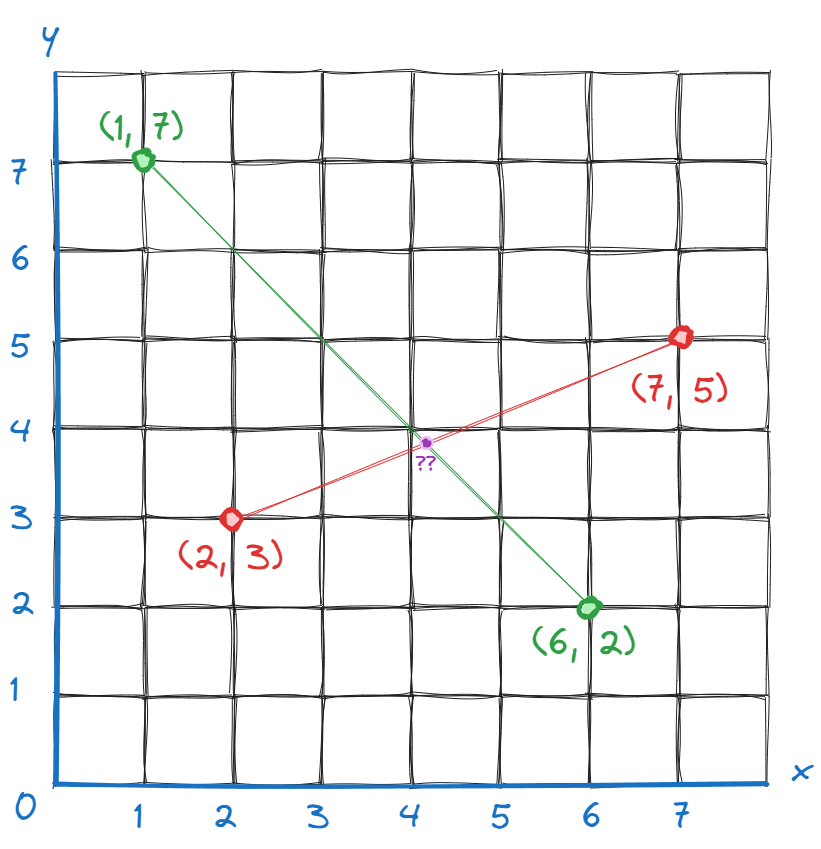

```js
function findCrossings(path) {
    const crossings = [] // Initialize an array to store the crossings
    const pathlines = [] // Initialize an array to store the lines 
    for (let i = 0; i < path.length - 1; i++) {
        const lineSegment = { x1: path[i].x, y1: path[i].y, x2: path[i + 1].x, y2: path[i + 1].y }; //probably unnecessary
        // but keeps me sharp
        pathlines.push(lineSegment);
    }
    for (let i = 0; i < pathlines.length - 1; i++) { // Loop through the lines
        for (let j = i + 1; j < pathlines.length; j++) { // Loop through the lines again
            const crossing = findCrossing(pathlines[i], pathlines[j]); // Find the crossing of the two lines
            if (crossing) { // If there is a crossing
                crossings.push(crossing); // Add it to the crossings array
            }
        }
    }
    return crossings; // Return the crossings array
}

function findCrossing(lineseg1, lineseg2) {
    // Unpack the linesegs into variables because math
    let x1 = lineseg1.x1;
    let y1 = lineseg1.y1;
    let x2 = lineseg1.x2;
    let y2 = lineseg1.y2;

    let x3 = lineseg2.x1;
    let y3 = lineseg2.y1;
    let x4 = lineseg2.x2;
    let y4 = lineseg2.y2;

    // Calculate slopes and intercepts
    const m1 = (y2 - y1) / (x2 - x1);
    const b1 = y1 - m1 * x1;

    const m2 = (y4 - y3) / (x4 - x3);
    const b2 = y3 - m2 * x3;

    // Check if lines are parallel
    if (m1 === m2) {
        // Check if lines are coincident
        if (b1 === b2) {
            return true; // Coincident lines
        } else {
            return false; // Parallel but not coincident
        }
    }

    // Calculate intersection point
    const intersectionX = (b2 - b1) / (m1 - m2);
    const intersectionY = m1 * intersectionX + b1;

    // Check if intersection point is within the bounds of the line segments
    if (
        isBetween(intersectionX, x1, x2) &&
        isBetween(intersectionY, y1, y2) &&
        isBetween(intersectionX, x3, x4) &&
        isBetween(intersectionY, y3, y4)
    ) {
        return { x: intersectionX, y: intersectionY }; // Lines intersect
    } else {
        return false; // Lines do not intersect
    }
}

// Helper function to check if a value is between two other values
function isBetween(value, minValue, maxValue) {
    return value >= Math.min(minValue, maxValue) && value <= Math.max(minValue, maxValue);
}
```


> d) Create a program that takes 2 branches at a time, detects crossings, and optimizes the route based on this (2-opt). How much percent is your 2-opt algorithm better (shorter) than the NN algorithm with 500 cities? (Approximately 8% better on my desktop in about 2 seconds)

In [52]:
def two_opt(cities: frozenset):
    """
    2-opt algorithm for solving the TSP
    """
    return None

> e)
> 
> - (1) What is the time complexity of the 2-opt algorithm?
> 
> - (2) What does this mean? Suppose you test with 1000 nodes, and it takes (for example) 10 seconds, how long will it take with 2000 nodes?

1. The time complexity of the 2-opt algorithm is 
2. This means that if we test with 1000 nodes, and it takes 10 seconds, it will take {N} seconds with 2000 nodes.

## 2. Minimax - Othello

> In theme 2.3, we have already implemented AI for the game Othello once. It didn't go smoothly in every group, and not every group member programmed this part. If you've forgotten the rules, there's a PDF on Blackboard with a description of the game rules. It might also be good to play the game again, for example, on Android:
> 
> What do we need in terms of data structures?
> At the very least, a representation of the 8x8 board. This can be done with a 1- or 2-dimensional list. Furthermore, we need to determine the neighbors of a cell and also the edges > of the board.
> In addition, we will need to create a number of helper functions:
> - Finding 'brackets' (given a position, a player, and a direction): given a position, what is the corresponding position that encloses a row of the opponent's stones?
> - Keeping track of whose turn it is;
> - Making a move;
> - In the case of a bracket: 'flipping' the enclosed stones of the opponent;
> - Keeping track of the score;
> - An implementation of a strategy: determining the best move.
>
> Othello is a turn-based two-player strategy board game.
> 
> -----------------------------------------------------------------------------
> Board representation
> 
> We represent the board as a flat-list of 100 elements, which includes each square on the board as well as the outside edge. Each consecutive sublist of ten elements represents a single row, and each list element stores a piece. 
> An initial board contains four pieces in the center:

```
    ? ? ? ? ? ? ? ? ? ?
    ? . . . . . . . . ?
    ? . . . . . . . . ?
    ? . . . . . . . . ?
    ? . . . o @ . . . ?
    ? . . . @ o . . . ?
    ? . . . . . . . . ?
    ? . . . . . . . . ?
    ? . . . . . . . . ?
    ? ? ? ? ? ? ? ? ? ?
```

> The outside edge is marked ?, empty squares are ., black is @, and white is o.
> 
> This representation has two useful properties:
> 
> 1. Square (m,n) can be accessed as `board[mn]`, and m,n means m*10 + n. This avoids conversion between square locations and list indexes.
> 
> 2. Operations involving bounds checking are slightly simpler.


In [53]:
EMPTY, BLACK, WHITE, OUTER = '.', 'O', 'X', '|'
PIECES = (EMPTY, BLACK, WHITE, OUTER)
PLAYERS = {BLACK: 'Black', WHITE: 'White'}

# To refer to neighbor squares we can add a direction to a square.
UP, DOWN, LEFT, RIGHT = -10, 10, -1, 1
UP_RIGHT, DOWN_RIGHT, DOWN_LEFT, UP_LEFT = -9, 11, 9, -11
# in total 8 directions.
DIRECTIONS = (UP, UP_RIGHT, RIGHT, DOWN_RIGHT, DOWN, DOWN_LEFT, LEFT, UP_LEFT)

In [54]:
def squares():
    """
    List all the valid squares on the board.

    Returns:
        list: A list of valid integers [11, 12, ...]; e.g., 19, 20, 21 are invalid.
              11 means the first row, first col because the board size is 10x10.
    """
    return [i for i in range(11, 89) if 1 <= (i % 10) <= 8]

def initial_board():
    """
    Create a new board with the initial black and white positions filled.

    Returns:
        list: A list representing the initial board state.
    """
    board = [OUTER] * 100
    for i in squares():
        board[i] = EMPTY
    # The middle four squares should hold the initial piece positions.
    board[44], board[45] = WHITE, BLACK
    board[54], board[55] = BLACK, WHITE
    return board

def print_board(board):
    """
    Get a string representation of the board.

    Args:
        board (list): The current board state.

    Returns:
        str: A string representation of the board.
    """
    rep = ''
    rep += '  %s\n' % ' '.join(map(str, range(1, 9)))
    for row in range(1, 9):
        begin, end = 10 * row + 1, 10 * row + 9
        rep += '%d %s\n' % (row, ' '.join(board[begin:end]))
    return rep



In [55]:
# -----------------------------------------------------------------------------
# Playing the game

# We need functions to get moves from players, check to make sure that the moves
# are legal, apply the moves to the board, and detect when the game is over.

# Checking moves. A move must be both valid and legal: it must refer to a real square,
# and it must form a bracket with another piece of the same color with pieces of the
# opposite color in between.

def is_valid(move):
    """
    Check if the move is a square on the board.

    Args:
        move (int): The move to be checked.

    Returns:
        bool: True if the move is a square on the board; False otherwise.
    """
    return isinstance(move, int) and move in squares()

def opponent(player):
    """
    Get the player's opponent piece.

    Args:
        player (str): The current player.

    Returns:
        str: The opponent's piece.
    """
    return BLACK if player is WHITE else WHITE

def find_bracket(square, player, board, direction):
    """
    Find and return the square that forms a bracket with a given square for the player
    in the given direction; returns None if no such square exists.

    Args:
        square (int): The square to find the bracket for.
        player (str): The current player.
        board (list): The current board state.
        direction (int): The direction to search for a bracket.

    Returns:
        int or None: The square that forms a bracket or None if no bracket exists.
    """
    bracket = square + direction
    if board[bracket] == player:
        return None
    opp = opponent(player)
    while board[bracket] == opp:
        bracket += direction
    return None if board[bracket] in (OUTER, EMPTY) else bracket

def is_legal(move, player, board):
    """
    Check if the move is legal for the player.

    Args:
        move (int): The move to be checked.
        player (str): The current player.
        board (list): The current board state.

    Returns:
        bool: True if the move is legal; False otherwise.
    """
    hasbracket = lambda direction: find_bracket(move, player, board, direction)
    return board[move] == EMPTY and any(hasbracket(x) for x in DIRECTIONS)

def make_move(move, player, board):
    """
    Update the board and flip all bracketed pieces when the player makes a valid move.

    Args:
        move (int): The move to be applied.
        player (str): The current player.
        board (list): The current board state.

    Returns:
        list: The updated board state.
    """
    board[move] = player
    for d in DIRECTIONS:
        make_flips(move, player, board, d)
    return board

def make_flips(move, player, board, direction):
    """
    Flip pieces in the given direction as a result of the move by the player.

    Args:
        move (int): The move made by the player.
        player (str): The current player.
        board (list): The current board state.
        direction (int): The direction to flip pieces.
    """
    bracket = find_bracket(move, player, board, direction)
    if not bracket:
        return
    square = move + direction
    while square != bracket:
        board[square] = player
        square += direction

In [56]:

# Monitoring players

# Define an exception
class IllegalMoveError(Exception):
    """
    Exception raised for illegal moves.

    Attributes:
        player (str): The player attempting the illegal move.
        move (int): The illegal move.
        board (list): The current board state.
    """

    def __init__(self, player, move, board):
        self.player = player
        self.move = move
        self.board = board

    def __str__(self):
        return '%s cannot move to square %d' % (PLAYERS[self.player], self.move)

def legal_moves(player, board):
    """
    Get a list of all legal moves for the player.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        list: A list of legal moves.
    """
    return [sq for sq in squares() if is_legal(sq, player, board)]

def any_legal_move(player, board):
    """
    Check if the player can make any legal moves.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        bool: True if the player can make any legal moves; False otherwise.
    """
    return any(is_legal(sq, player, board) for sq in squares())

In [57]:
# Putting it all together. Each round consists of:
# - Get a move from the current player.
# - Apply it to the board.
# - Switch players. If the game is over, get the final score.

def play(black_strategy: callable, white_strategy: callable):
    """
    Play a game of Othello and return the final board and score.

    Args:
        black_strategy (function): The strategy for the black player.
        white_strategy (function): The strategy for the white player.

    Returns:
        tuple: A tuple containing the final board and score.
    """
    board = initial_board()
    player = BLACK
    strategy = black_strategy if player == BLACK else white_strategy
    while player is not None:
        print(print_board(board))
        move = get_move(strategy, player, board)
        if move is not None:
            make_move(move, player, board)
        player = next_player(board, player)
    return board, score(BLACK, board)


def next_player(board, prev_player):
    """
    Determine which player should move next.

    Args:
        board (list): The current board state.
        prev_player (str): The player who made the last move.

    Returns:
        str or None: The next player or None if no legal moves exist.
    """
    opp = opponent(prev_player)
    if any_legal_move(opp, board):
        return opp
    elif any_legal_move(prev_player, board):
        return prev_player
    return None


def get_move(strategy, player, board):
    """
    Call strategy(player, board) to get a move.

    Args:
        strategy (function): The strategy function for getting a move.
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The move obtained from the strategy.
    """
    copy = list(board)  # copy the board to prevent cheating
    move = strategy(player, copy)
    if not is_valid(move) or not is_legal(move, player, board):
        raise IllegalMoveError(player, move, copy)
    return move


def score(player, board):
    """
    Compute the player's score (number of player's pieces minus opponent's).

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The player's score.
    """
    mine, theirs = 0, 0
    opp = opponent(player)
    for sq in squares():
        piece = board[sq]
        if piece == player:
            mine += 1
        elif piece == opp:
            theirs += 1
    return mine - theirs

> a) Implement a simple version of Othello, where the opponent makes random (valid) moves. You don't need to create a GUI; it can be done with a CLI. On Blackboard, start_othello.py can be found, which you can use for further implementation.

In [58]:
def play_othello(black_strategy: callable = None, white_strategy: callable = None) -> None:
    """
    Play a game of Othello against the computer.
    """
    strategies = {
        BLACK: lambda who, board: random.choice(legal_moves(who, board)) if black_strategy is None else black_strategy(who, board),
        WHITE: lambda who, board: random.choice(legal_moves(who, board)) if white_strategy is None else white_strategy(who, board)
    }
    board, score = play(strategies[BLACK], strategies[WHITE])
    print_board(board)
    print('Winner: %s' %
          ('Black' if score > 0 else 'White' if score < 0 else 'Tie'))
    print('%s wins by %d points' %
          (PLAYERS[BLACK] if score > 0 else PLAYERS[WHITE], abs(score)))


play_othello()

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . . . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . . . . . .
4 . . O O O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . X . . . . .
4 . . O X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . O . . . . .
3 . . O . . . . .
4 . . O X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . O . . . . .
3 . . O . . . . .
4 . . O X O . . .
5 . . . X X . . .
6 . . . X . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . O . . . . .
3 . . O . . . . .
4 . . O X O . . .
5 . . . O X . . .
6 . . O X . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . 

> b) Implement a strategy based on Minimax.

In [59]:
class Node:
    def __init__(self, player, board):
        self.player = player
        self.board = board

    def is_terminal(self):
        return not any_legal_move(self.player, self.board)

    def value(self):
        return score(self.player, self.board)

    def children(self):
        for move in legal_moves(self.player, self.board):
            child_board = list(self.board)
            make_move(move, self.player, child_board)
            yield Node(opponent(self.player), child_board)

def minimax(player, board):
    """
    Return the move that minimizes the maximum loss for the current player.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The move that minimizes the maximum loss.
    """
    def min_max(node, depth, max_player):
        """
        Minimax algorithm using the score() function as the heuristic.
        """
        if depth == 0 or node.is_terminal():
            return node.value()

        if max_player:
            value = -math.inf
            for child in node.children():
                value = max(value, min_max(child, depth - 1, False))
            return value
        else:
            value = math.inf
            for child in node.children():
                value = min(value, min_max(child, depth - 1, True))
            return value

    return max(legal_moves(player, board), key=lambda move: min_max(Node(player, board), 4, False))



In [60]:
play_othello(minimax, None)

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . . . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . O . . . .
4 . . . O O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .



  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . O O O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . X . . . . . .
3 . O X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . O . . . . . .
2 . O . . . . . .
3 . O X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 X O . . . . . .
2 . X . . . . . .
3 . O X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 X O . . . . . .
2 . X . . . . . .
3 . O X O . . . .
4 . . O O O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 X X X . . . . .
2 . X . . . . . .
3 . O X O . . . .
4 . . O O O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 X 

> c) An important aspect for the quality of the AI is the heuristic that evaluates the board. Why is counting stones alone not a good evaluation function? Think of and implement a better evaluation function.

The score is not a good evaluation function because it does not take into account the mobility of the player, because they are able to reclaim the board if they have more mobility than the opponent. A better evaluation function would be to take into account the mobility of the player, and the stability of the player's pieces. The stability of a piece is determined by how many pieces it is adjacent to. The more pieces it is adjacent to, the more stable it is. The stability of a player is determined by the stability of all of their pieces. The more stable a player is, the more likely they are to win.

In [61]:
def score_diff(player, board):
    """
    Compute the score difference (player - opponent) for the given player.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The heuristic value of the board for the player.
    """
    opp = opponent(player)
    total = 0
    for sq in squares():
        piece = board[sq]
        if piece == player:
            total += 1
        elif piece == opp:
            total -= 1
    return total

def mobility(player, board):
    """
    Compute the difference in the number of legal moves available to the player and
    the opponent.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The heuristic value of the board for the player.
    """
    opp = opponent(player)
    return len(legal_moves(player, board)) - len(legal_moves(opp, board))

def heuristic(player, board):
    """
    Compute the heuristic value of the board for the player.

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The heuristic value of the board for the player.
    """
    return score_diff(player, board) + mobility(player, board)

In [63]:
def optimized_minimax(player, board):
    """
    Return the move that minimizes the maximum loss for the current player.
    Optimized using a new heuristic() function (see above)

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The move that minimizes the maximum loss.
    """
    def min_max(node, depth, max_player):
        """
        Minimax algorithm using the heuristic() function as the heuristic.
        """
        if depth == 0 or node.is_terminal():
            return heuristic(player, node.board)

        if max_player:
            value = -math.inf
            for child in node.children():
                value = max(value, min_max(child, depth - 1, False))
            return value
        else:
            value = math.inf
            for child in node.children():
                value = min(value, min_max(child, depth - 1, True))
            return value

    return max(legal_moves(player, board), key=lambda move: min_max(Node(player, board), 4, False))

In [64]:
play_othello(optimized_minimax, None)

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . . . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . . O . . . .
4 . . . O O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . . X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . . . . . . . .
3 . O O O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . . . . . . . .
2 . X . . . . . .
3 . O X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 . O . . . . . .
2 . O . . . . . .
3 . O X O . . . .
4 . . . X O . . .
5 . . . O X . . .
6 . . . . . . . .
7 . . . . . . . .
8 . . . . . . . .

  1 2 3 4 5 6 7 8
1 X 

> d) When the requirement is that a move must be made within two seconds, how deep can you go with Minimax?

Let's time this

In [73]:
import time


def optimized_minimax(player, board, depth=4) -> int:
    """
    Return the move that minimizes the maximum loss for the current player.
    Optimized using a new heuristic() function (see above)

    Args:
        player (str): The current player.
        board (list): The current board state.

    Returns:
        int: The move that minimizes the maximum loss.
    """
    def min_max(node, depth, max_player):
        """
        Minimax algorithm using the heuristic() function as the heuristic.
        """
        if depth == 0 or node.is_terminal():
            return heuristic(player, node.board)

        if max_player:
            value = -math.inf
            for child in node.children():
                value = max(value, min_max(child, depth - 1, False))
            return value
        else:
            value = math.inf
            for child in node.children():
                value = min(value, min_max(child, depth - 1, True))
            return value

    return max(legal_moves(player, board), key=lambda move: min_max(Node(player, board), depth, False))


def time_move(depth):
    """
    Time the minimax() function.
    """

    board = [
        '|', '|', '|', '|', '|', '|', '|', '|',
        '|', '|', '|', '.', '.', '.', '.', '.', '.',
        '.', '.', '.', '.', '.', '.', '.', '.', '|',
        '|', '|', '.', '.', '.', '.', '.', '.', '.',
        '.', '.', '.', '.', 'O', '.', 'O', '.', '|',
        '|', '|', '.', '.', 'O', '.', 'O', 'O', '.',
        '.', '.', '.', '.', 'O', 'X', 'O', '.', '|',
        '|', '|', '.', '.', 'X', 'O', 'O', '.', '.',
        '.', '.', 'X', 'X', 'O', '.', '.', '.', '|',
        '|', '|', '.', 'X', '.', '.', '.', '.', '.',
        '.', '.', '.', '.', '.', '.', '.', '.', '|',
        '|', '|', '|', '|', '|', '|', '|', '|', '|'
    ]

    start = time.time()
    move = optimized_minimax(BLACK, board, depth)
    stop = time.time()
    delta = stop - start
    print('Best move: %d\nTime: %fs' % (move, delta))
    return delta


for depth in range(1, 500):
    print('Depth: %d' % depth)
    d = time_move(depth)
    if d > 3:
        break

Depth: 1
Best move: 65
Time: 0.001997s
Depth: 2
Best move: 65
Time: 0.007035s
Depth: 3
Best move: 65
Time: 0.018774s
Depth: 4
Best move: 65
Time: 0.063990s
Depth: 5
Best move: 65
Time: 0.305225s
Depth: 6
Best move: 65
Time: 1.614037s
Depth: 7
Best move: 65
Time: 7.728960s


Here is shown that the max depth it can go to is 6, and that it takes 1.6 seconds to do so.

> e) Improve the performance of Minimax by applying pruning.

#### Pruning

**Alpha–beta pruning** is a search algorithm that seeks to decrease the number of nodes that are evaluated by the minimax algorithm in its search tree. It is an adversarial search algorithm used commonly for machine playing of two-player combinatorial games (Tic-tac-toe, Chess, Connect 4, etc.). It stops evaluating a move when at least one possibility has been found that proves the move to be worse than a previously examined move. Such moves need not be evaluated further. When applied to a standard minimax tree, it returns the same move as minimax would, but prunes away branches that cannot possibly influence the final decision. [1](https://en.wikipedia.org/wiki/Alpha%E2%80%93beta_pruning)

> f) What is the maximum depth at which the program still has acceptable performance? In what ways could you further improve performance?

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec euismod, nisl eget ultricies ultricies, nunc nisl ultricies nunc, eget ultric

## 3. Expectimax - 2048

> 2048 is a sliding puzzle game written by Gabriele Cirulli in 2014. Gabriele created the game in a weekend using JS and CSS for the browser. It became a sensation in 2014 as the game is quite addictive. There are many Android/iOS versions, but you can play the original one here (using arrow keys): 2048. In the game, when two identical numbers slide next to or above each other, they are added together and replaced by a tile with the new value. The player wins the game by reaching the number 2048, achieved by sliding two tiles of 1024 together. If no more moves are possible, the player loses.
>
> The sliding puzzle has a 4x4 board, and the player can only slide tiles left, right, up, or down (using arrow keys or swiping). After each move, a new tile with a value of 2 or 4 will appear. Tiles (in all four rows or columns) slide – if possible – in the chosen direction: tiles with the same value are added, creating a new tile, and an empty spot is filled.
>
> The goal is to slide tiles to create a tile with the value 2048. After reaching 2048, the game can continue, with the maximum score achievable being 2^16, but in that case, a '4' must be added at the last moment.
>
> The original source code (JS) can be found here: source. Gabriele's story can be found here: story. As seen in the source code, the chance of a '2' is 90%, and the chance of a '4' is 10%.
>
> After playing the game a few times, you'll understand that the general strategy is as follows:
>
    > - Keep the highest number in a corner, for example, the top-left corner.
    > - Ensure that high numbers are in the top-left corner.
    > - Ensure that empty cells do not move to the top-left corner, keeping them in the bottom-right.
    > - Keep cells with equal values close to each other.
>
> There is a lot of information on the internet about the best heuristic to evaluate the board, see, for example, stackoverflow.

> a) On Blackboard, you can find the file start_code_2048.zip. This version makes random moves and will almost always lose. Improve the game by adding Expectimax. Consider the above-mentioned general strategy when evaluating the board (heuristic).

> b) What is the maximum depth at which the program still has acceptable performance? In what ways could you improve performance?

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec auctor, nisl eget ultricies ultricies, nunc nisl ultricies nunc, quis uq amet.